<a href="https://colab.research.google.com/github/Chinmayeekip/CarrotsGame/blob/master/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules and Libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import tree

from six import StringIO 
import pydotplus
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
import io
from google.colab import files 
import seaborn as sns
import matplotlib.pyplot as plt

**Function to Visualized Decision Tree:**

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
  dot_data = StringIO()
  tree.export_graphviz(clf,out_file = dot_data,
                       feature_names = feature_name,
                       class_names = target_name,
                       filled = True, rounded = True,
                       special_characters = True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  return Image(graph.create_png())

**Upload Files:**

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['redWineQuality.csv'])) 
df.head()

Saving redWineQuality.csv to redWineQuality.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Data Cleaning and Checking:**

In [ ]:
df.columns = [label.replace(' ','_') for label in df.columns]
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Data Exploration:**

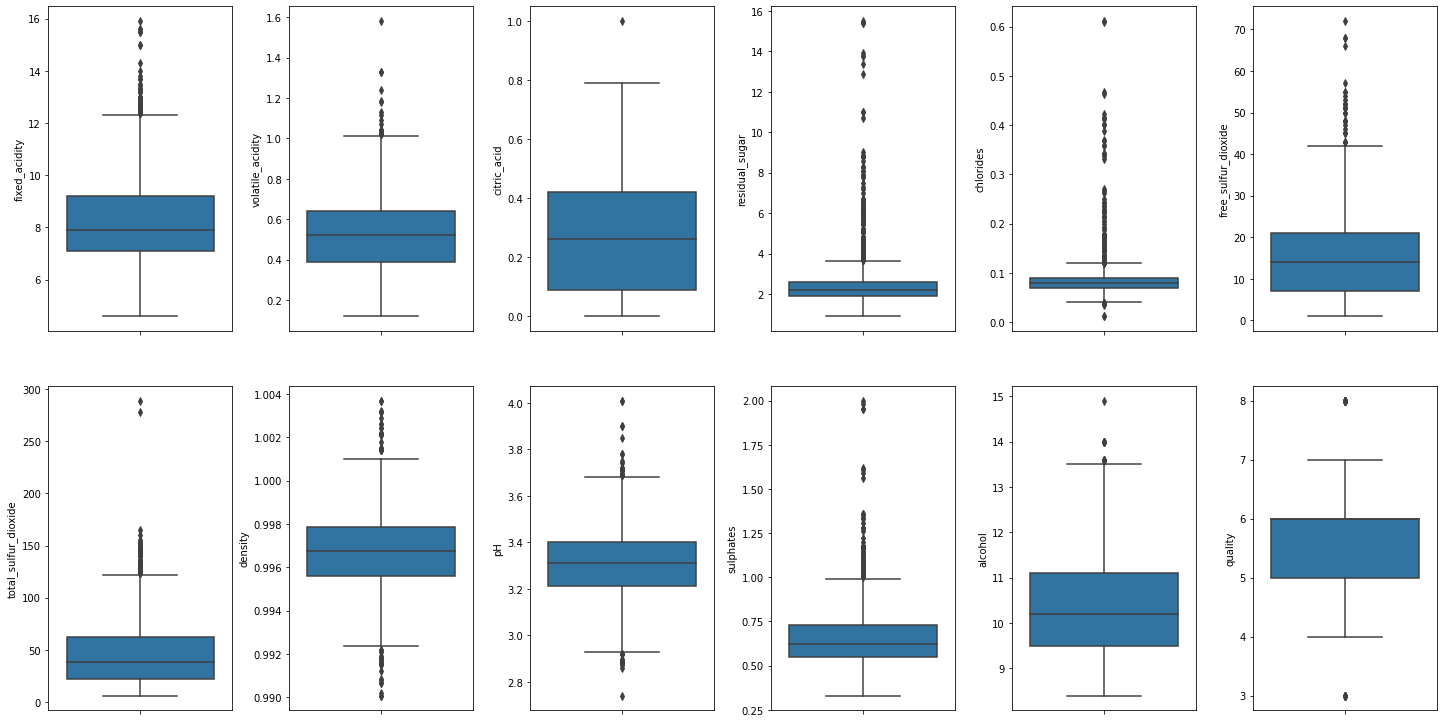

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


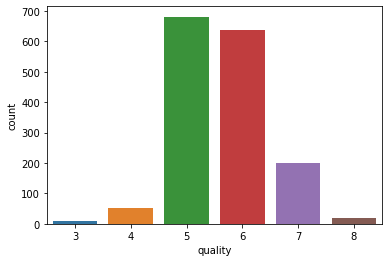

In [ ]:
sns.countplot(df['quality'])

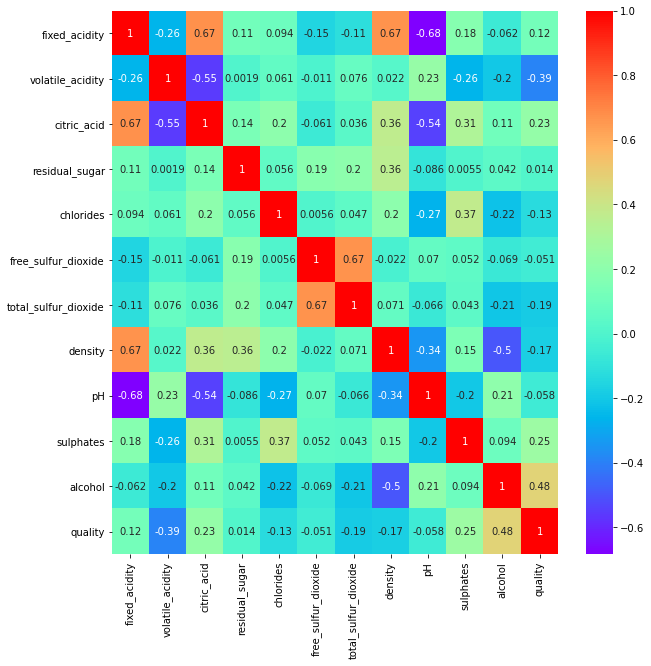

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='rainbow')

**Decision Tree:**

In [ ]:
X = df.drop(columns=[ 'quality'])
y = df['quality']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3)
dt = dt.fit(X_train, y_train)

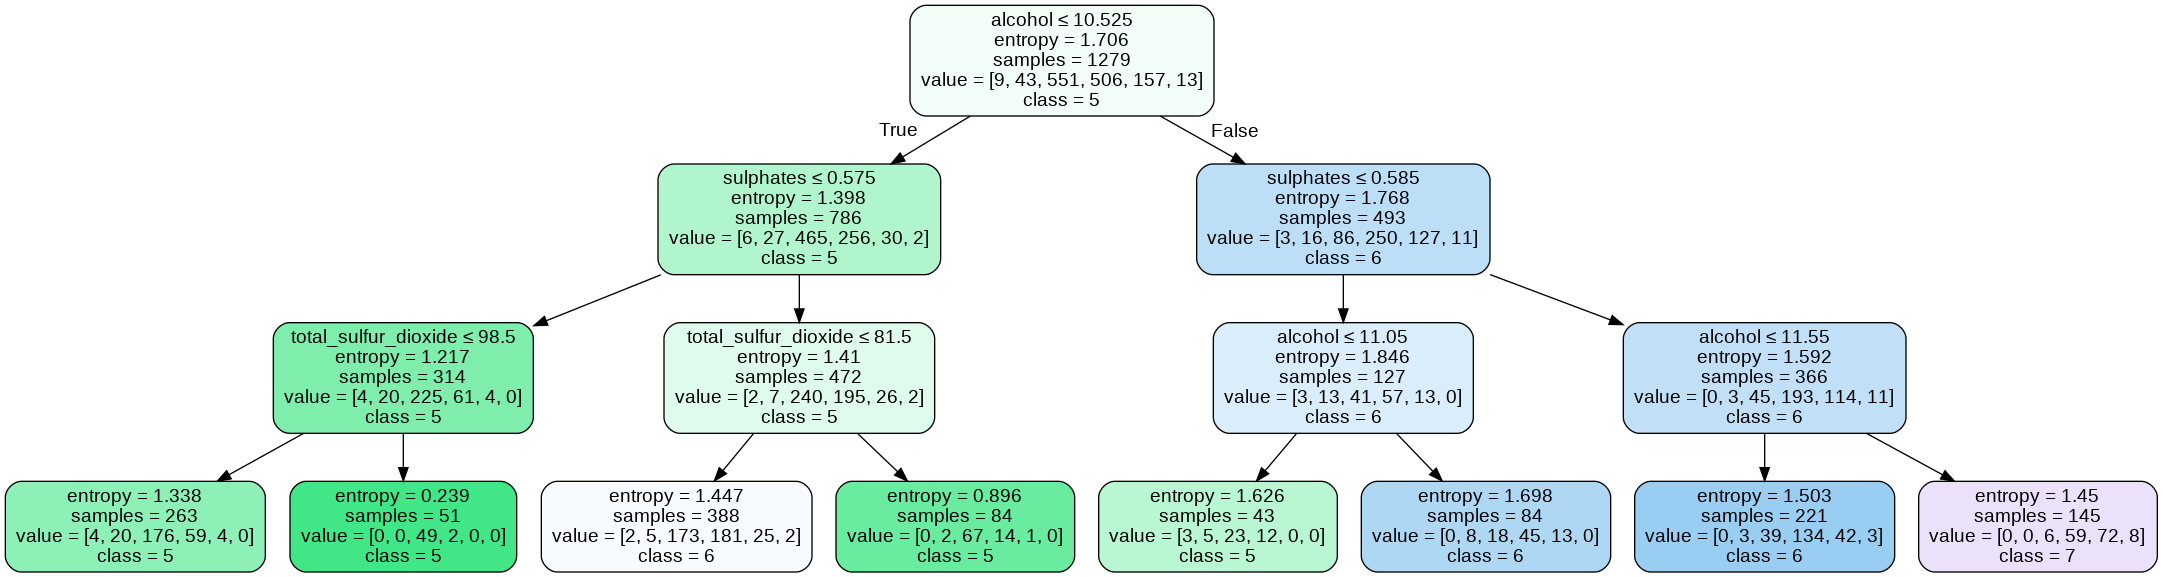

In [ ]:
x_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_features = ['3','4','5','6','7','8','9']
plot_decision_tree(dt,x_features,y_features)


In [ ]:
print("Accuracy:", dt.score(X_test, y_test) * 100)
    
score = cross_val_score(dt, X, y, cv=7)
print("CV Score:", np.mean(score)*100)

Accuracy: 54.6875
CV Score: 53.847774457979014


In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn import metrics
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))


Misclassified samples: 145


**Linear Regression**

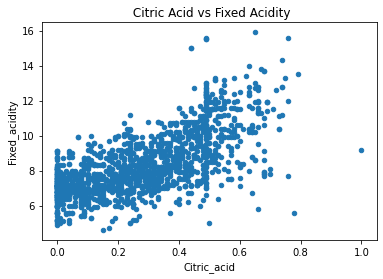

In [ ]:
df.plot(x ='citric_acid',y='fixed_acidity',kind ='scatter')
plt.title(' Citric Acid vs Fixed Acidity')
plt.xlabel('Citric_acid')
plt.ylabel('Fixed_acidity')
plt.show()

In [ ]:
X = df[['citric_acid']]
y = df[['fixed_acidity']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = regressor.predict(X_test)


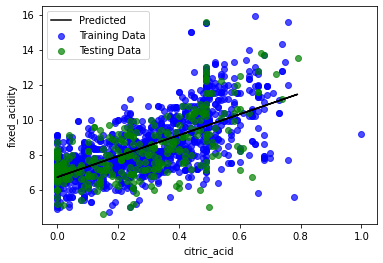

In [ ]:
plt.scatter(X_train,y_train,label ="Training Data",color = 'blue',alpha = 0.7)
plt.scatter(X_test,y_test,label ="Testing Data",color = 'g',alpha = 0.7)

plt.plot(X_test,Y_pred,color='black',label='Predicted') 
plt.xlabel('citric_acid')
plt.ylabel('fixed_acidity')
plt.legend()
plt.show()

In [ ]:
regressor.score(X_test,y_test)*100

42.6843087655718